In [2]:
def to_image(pixel):
    return [[pixel]]

def to_pixel(image):
    return image[0][0]

def convert_rgb2lab(rgb_pixel):
    return to_pixel(color.rgb2lab(to_image(rgb_pixel)))

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import matplotlib.colors
import matplotlib.colors as c
import pandas as pd
import matplotlib.colors as mcolors
from skimage import color
from skimage import io

In [4]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [5]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [6]:
CSS_ELLY = ['black','silver','gray','white','maroon','red','purple','fuchsia','green','lime','olive','yellow','navy','blue','teal','aqua']
CSS_ELENA = {}
for x in CSS_ELLY:
    CSS_ELENA[x] = mcolors.CSS4_COLORS[x]

In [7]:

CSS_RGB_COLORS = [mcolors.hex2color(c) for c in CSS_ELENA]

CSS_LAB_COLORS = [convert_rgb2lab(c) for c in CSS_RGB_COLORS]

BASE_RGB_COLORS = [[float(v) for v in c] for c in mcolors.BASE_COLORS.values()]

BASE_LAB_COLORS = [convert_rgb2lab(c) for c in BASE_RGB_COLORS]

In [8]:
def get_centroids_base_colors(image, number_of_colors=10, show_chart=True):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]

    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    #rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    lab_colors = [convert_rgb2lab(p) for p in ordered_colors]
    
    centroids_df = pd.DataFrame()
    
    for i in range(number_of_colors):
        c_dict = {}
        print(ordered_colors[i])
        rgb_c = ordered_colors[i]
        c_dict['centroid'] = rgb_c
        
        nearest_base_color = 0
        lab_c = lab_colors[i]
        
        min_distance = deltaE_cie76(lab_c, CSS_LAB_COLORS[0])
        nearest_base_color_index = 0
        
        i = 1
        for c in CSS_LAB_COLORS[1:]:
            tmp_distance = deltaE_cie76(lab_c, c)
            if (tmp_distance < min_distance):
                min_distance = tmp_distance
                nearest_base_color = i
            i += 1
                
        c_dict['nearest_base_color'] = CSS_RGB_COLORS[nearest_base_color]
        
        centroids_df = centroids_df.append(c_dict, ignore_index=True)
        nearest_base_colors_rgbs = centroids_df['nearest_base_color']
        nearest_base_colors_hex = [mcolors.rgb2hex(c) for c in nearest_base_colors_rgbs] 
    
    if (show_chart):
        plt.figure(figsize = (16, 6))
        fig_dims = (1, 2)
        ax_1 = plt.subplot2grid(fig_dims, (0, 0))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
        ax_1 = plt.subplot2grid(fig_dims, (0, 1))
        plt.pie(counts.values(), labels = nearest_base_colors_hex, colors = nearest_base_colors_rgbs)
            
    return centroids_df

In [10]:
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\Pinocchio\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df = centroids_df.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output_0005.png_resized.png
[0.03565954 0.01687714 0.01152472]
[0.06613096 0.05670799 0.06946574]
[0.13122665 0.1074355  0.12422935]
[0.20229817 0.17834202 0.17601534]
[0.12037545 0.05238047 0.03295986]
[0.29747452 0.14048861 0.0546011 ]
[0.21068114 0.29844794 0.31607748]
[0.44699526 0.28142119 0.14738866]
[0.56597057 0.41270935 0.26493806]
[0.63153476 0.69661838 0.58128731]
output_0007.png_resized.png
[0.62542694 0.63049044 0.50076226]
[0.56407228 0.5267293  0.38164176]
[0.43964866 0.40664993 0.30354269]
[0.34999848 0.24219361 0.15007642]
[0.14943722 0.06752776 0.04173605]
[0.25876062 0.14695376 0.09806679]
[0.09899473 0.15589661 0.23650397]
[0.04566252 0.06857944 0.1389497 ]
[0.2783045  0.37607534 0.53712153]
[0.5089616  0.36210858 0.19572229]
output_0010.png_resized.png
[0.10307337 0.06578383 0.07074655]
[0.02681016 0.02652974 0.03551376]
[0.16325297 0.11324909 0.10442741]
[0.23429388 0.15761305 0.11051481]
[0.22492705 0.21386156 0.21705876]
[0.32622117 0.22378375 0.1412317 ]
[0.398

output_0075.png_resized.png
[0.42159139 0.34533914 0.25595499]
[0.35657438 0.26900098 0.19269796]
[0.29210783 0.20676041 0.16058765]
[0.23193852 0.15777625 0.14223913]
[0.4957573  0.49487756 0.42896641]
[0.11866083 0.07949486 0.11194429]
[0.53530548 0.65949741 0.70899819]
[0.64167921 0.66308947 0.5423565 ]
[0.57928685 0.39064445 0.15038725]
[0.84184011 0.73927499 0.29600595]
output_0077.png_resized.png
[0.57144227 0.40207393 0.28408467]
[0.42018779 0.30290703 0.22192966]
[0.30480667 0.16537082 0.13266944]
[0.50968298 0.1769886  0.13654183]
[0.30364272 0.4117256  0.43034823]
[0.70005503 0.51059339 0.27553268]
[0.53242239 0.60671193 0.33043216]
[0.66865474 0.62632414 0.50155345]
[0.20633835 0.28712515 0.09169724]
[0.0831908  0.09408406 0.12462804]
output_0080.png_resized.png
[0.30282869 0.21050907 0.14478732]
[0.23381693 0.15226648 0.11557282]
[0.16447235 0.10726838 0.08683564]
[0.07247116 0.04963808 0.03322123]
[0.38192566 0.25230359 0.15642213]
[0.45468855 0.36124444 0.2992755 ]
[0.677

[0.02054393 0.01330479 0.01516125]
[0.07236135 0.04528899 0.03686006]
[0.13104837 0.08604825 0.05829948]
[0.20254559 0.13192154 0.07403694]
[0.2916284  0.21592865 0.12688347]
[0.16817415 0.18311362 0.17621113]
[0.38417637 0.31781326 0.19838718]
[0.51351883 0.4244368  0.23330434]
[0.64206628 0.53001861 0.27985756]
[0.79168135 0.65036363 0.29958789]
output_0148.png_resized.png
[0.33025608 0.36387766 0.39506327]
[0.42728951 0.5056396  0.52671841]
[0.3109891  0.17606124 0.14031534]
[0.209655   0.12055098 0.11125294]
[0.04067978 0.17648016 0.31480505]
[0.10507765 0.29241742 0.43932455]
[0.04501816 0.05435067 0.05861072]
[0.50978243 0.60422583 0.62612692]
[0.69143203 0.76892076 0.8582707 ]
[0.25674774 0.4806747  0.56450917]
output_0151.png_resized.png
[0.29785189 0.34605329 0.43607239]
[0.21703661 0.25710924 0.35355041]
[0.05682859 0.09516725 0.18408342]
[0.03693308 0.0482532  0.08145285]
[0.14299333 0.16668966 0.25405195]
[0.47449119 0.507976   0.60576337]
[0.56509485 0.59396557 0.69965732]

C:\Users\Attilio\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


IndexError: list index out of range

In [11]:
centroids_df['nearest_base_color_hex'] = [mcolors.rgb2hex(c) for c in centroids_df['nearest_base_color']]

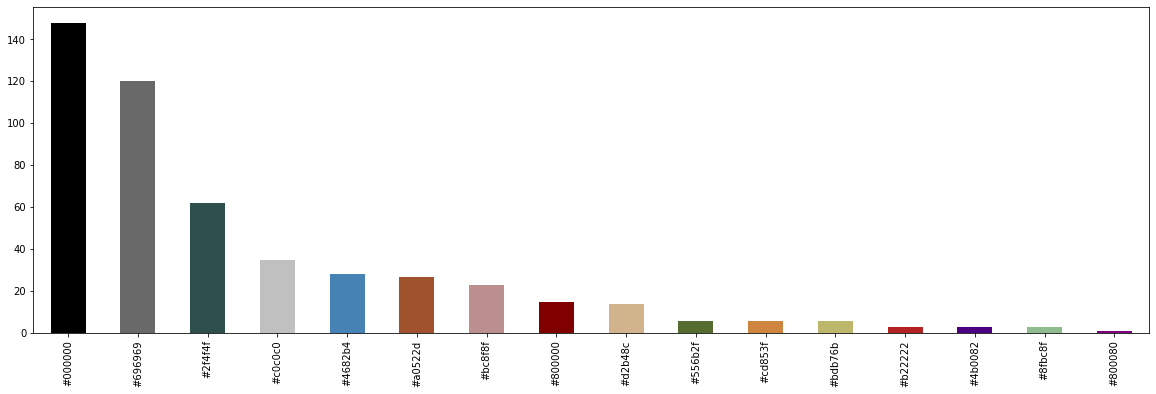

In [12]:
plt.figure(figsize = (20, 6))
centroids_df['nearest_base_color_hex'].value_counts().plot(kind = 'bar', color = list(centroids_df['nearest_base_color_hex'].value_counts().index))
plt.show()

In [9]:
import os
centroids_df = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\2010-Up-resized1\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df = centroids_df.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output_0004.png_resized - Copia.png
[0.00401169 0.00400413 0.00404657]
[0.04860522 0.04851811 0.04857535]
[0.12297849 0.12294148 0.122983  ]
[0.23261577 0.23257699 0.23264584]
[0.34406813 0.34404017 0.344076  ]
[0.43275844 0.43275207 0.43275432]
[0.52720355 0.52719217 0.52720111]
[0.62331334 0.62331425 0.62331425]
[0.72508268 0.72508268 0.72508268]
[0.81990249 0.81986808 0.81972182]
output_0006.png_resized - Copia.png
[0.05610838 0.05334048 0.06903891]
[0.10984918 0.10637067 0.12959238]
[0.14913943 0.19909719 0.27681907]
[0.3127722  0.35704585 0.42864937]
[0.44052726 0.47104053 0.56072993]
[0.53943701 0.61892684 0.70991187]
[0.77610558 0.86839821 0.9023792 ]
[0.01132657 0.01112366 0.01496139]
[0.2854034  0.27830478 0.28699271]
[0.1953931  0.16098676 0.15987466]
output_0008.png_resized - Copia.png
[0.08619628 0.05539843 0.03512823]
[0.16092976 0.11149409 0.07958136]
[0.19045561 0.16542626 0.19089463]
[0.34307342 0.21790736 0.09004278]
[0.51032497 0.38350016 0.25075765]
[0.47462182 0.305

[0.73933036 0.83441436 0.91997766]
[0.73227574 0.75194394 0.7830464 ]
[0.64951277 0.63590512 0.65792783]
[0.47599352 0.48487155 0.51680149]
[0.81055973 0.83945115 0.85813649]
[0.63403988 0.48481123 0.43545969]
[0.41886412 0.37338123 0.37008011]
[0.3418292  0.28190502 0.25742636]
[0.21035945 0.19203944 0.18659169]
[0.1094718  0.11465747 0.1281834 ]
output_0073.png_resized - Copia.png
[0.55291555 0.59048031 0.65065735]
[0.58305864 0.73911476 0.91384488]
[0.46179216 0.4817077  0.49802997]
[0.7009037  0.79997134 0.91057806]
[0.41810447 0.35085364 0.30312473]
[0.7816593  0.84117007 0.91058048]
[0.65838207 0.49585481 0.35436259]
[0.71112072 0.69714777 0.72451925]
[0.27028067 0.22344495 0.19458563]
[0.1187763  0.10793347 0.12046363]
output_0075.png_resized - Copia.png
[0.67299421 0.79423307 0.89939561]
[0.59992905 0.59230527 0.63449541]
[0.19578918 0.49981418 0.58220832]
[0.11299299 0.09391359 0.1288374 ]
[0.4941591  0.43682847 0.4146695 ]
[0.34730326 0.26991808 0.23504127]
[0.26459748 0.1448

[0.13964385 0.09950338 0.08203405]
[0.1969765  0.14508242 0.12208411]
[0.31897079 0.26955279 0.24501039]
[0.26759965 0.20037748 0.17370861]
[0.4756914  0.41244064 0.36155458]
[0.07516968 0.05283    0.04491906]
[0.40857185 0.34597587 0.29819748]
[0.56291507 0.49847488 0.46238891]
[0.7055608  0.61557695 0.59033899]
[0.83436094 0.72775922 0.7015471 ]
output_0128.png_resized.png
[0.85542521 0.80954004 0.75319742]
[0.83919281 0.76702674 0.73484473]
[0.8155164  0.73128575 0.68780354]
[0.78328893 0.6574441  0.59740724]
[0.77306532 0.58628901 0.47251022]
[0.73159142 0.49098552 0.38304255]
[0.66547954 0.40570852 0.32153237]
[0.57742572 0.34123969 0.27826366]
[0.50713571 0.29362982 0.24487572]
[0.40461605 0.23061075 0.20060628]
output_0130.png_resized.png
[0.81056856 0.65317877 0.57901394]
[0.72963592 0.51849443 0.42912039]
[0.53306011 0.34147409 0.28282593]
[0.43252716 0.26612832 0.21525035]
[0.65315223 0.40970492 0.32940395]
[0.33255776 0.20164232 0.15897135]
[0.23698786 0.14477507 0.11059223]

In [10]:
centroids_df['nearest_base_color_hex'] = [mcolors.rgb2hex(c) for c in centroids_df['nearest_base_color']]

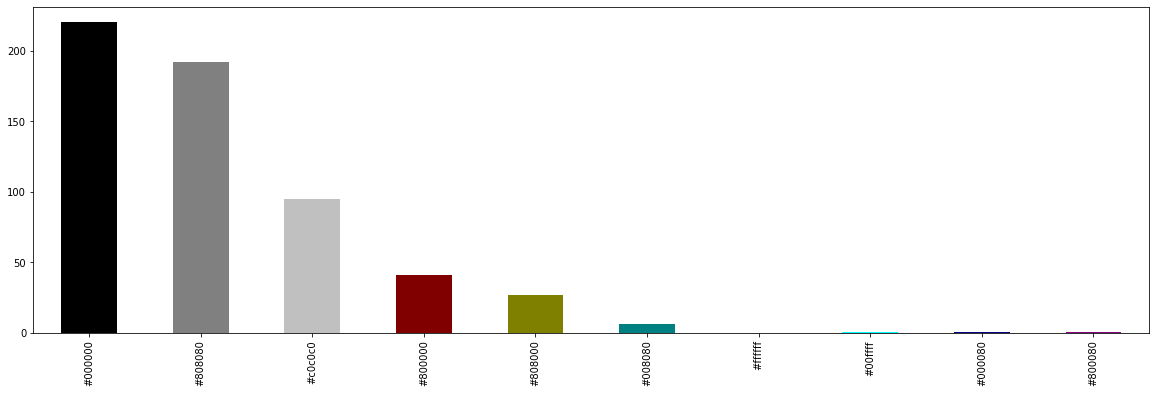

In [11]:
plt.figure(figsize = (20, 6))
centroids_df['nearest_base_color_hex'].value_counts().plot(kind = 'bar', color = list(centroids_df['nearest_base_color_hex'].value_counts().index))
plt.show()

In [ ]:
#200 img
import os
centroids_df_1 = pd.DataFrame()
directory = r'C:\Users\Attilio\Desktop\progettone\immagini\2010-Up-resized\\'
for r, d, files in os.walk(directory):
    for f in files:
        print(f)
        centroids_df_1 = centroids_df_1.append(get_centroids_base_colors(get_image(directory+f), show_chart=False))

output_0004.png_resized - Copia.png
[0.00401169 0.00400413 0.00404657]
[0.04970803 0.04962207 0.0496808 ]
[0.12724105 0.12720486 0.12724105]
[0.2369359  0.23689513 0.23696788]
[0.34545536 0.34542907 0.34546253]
[0.4346196  0.43461347 0.43461563]
[0.53096986 0.53095925 0.53096823]
[0.62754698 0.62754698 0.62754698]
[0.7291283 0.7291283 0.7291283]
[0.82113983 0.82110452 0.82095444]
output_0004.png_resized.png
[0.00490804 0.00489809 0.00494131]
[0.05073718 0.05064814 0.05070371]
[0.11866237 0.11862421 0.11867068]
[0.21755893 0.21753319 0.21756765]
[0.33086722 0.33082687 0.33088848]
[0.42083742 0.42083112 0.42083609]
[0.52706383 0.52705361 0.52706347]
[0.63653246 0.63653246 0.63653246]
[0.739414 0.739414 0.739414]
[0.82352272 0.82348544 0.82332696]
output_0005.png_resized.png
[0.04022867 0.04014853 0.04015801]
[0.07784181 0.07774767 0.07785352]
[0.14041674 0.14039752 0.14040767]
[0.2038985  0.203874   0.20388517]
[0.28138582 0.28135461 0.28136394]
[0.37237974 0.37237506 0.37237758]
[0.4763

[0.44448026 0.34043763 0.32731706]
[0.63368358 0.5017765  0.44731864]
[0.20023571 0.23503398 0.29781664]
[0.24595317 0.15194159 0.11667122]
[0.11401083 0.0707065  0.05821418]
[0.39138065 0.24503488 0.16939788]
[0.61664677 0.39403134 0.24968789]
[0.76536033 0.64518176 0.61376113]
[0.32189601 0.38171068 0.72486642]
[0.82605452 0.82276156 0.80328859]
output_0019.png_resized.png
[0.58113908 0.35052107 0.28291025]
[0.72260095 0.43240149 0.34651561]
[0.50154357 0.28111652 0.19890535]
[0.3378826  0.19858661 0.16054769]
[0.20737331 0.12709891 0.10343958]
[0.38140241 0.27281898 0.24382938]
[0.11018019 0.06709661 0.05144986]
[0.77868564 0.63607942 0.55281978]
[0.86601623 0.79877153 0.74320804]
[0.61018284 0.51141474 0.45038386]
output_0020.png_resized - Copia.png
[0.43629073 0.34824811 0.32485382]
[0.55046706 0.4385146  0.39647828]
[0.58096702 0.52893013 0.56128352]
[0.33434628 0.27158766 0.25334496]
[0.23517654 0.18921607 0.18820471]
[0.72917238 0.70056896 0.72263994]
[0.87927005 0.8804154  0.8

[0.48518495 0.46168563 0.43656332]
[0.40099051 0.37230432 0.3423143 ]
[0.2615424  0.21262019 0.16894349]
[0.17506818 0.13231343 0.0981287 ]
[0.09211479 0.06452141 0.04476778]
[0.33410371 0.29366881 0.254324  ]
[0.58588468 0.56750717 0.54255657]
[0.70690645 0.68117324 0.6538984 ]
[0.02030441 0.01847298 0.01703666]
[0.9069968  0.89214427 0.87030632]
output_0035.png_resized.png
[0.07956962 0.07642511 0.119467  ]
[0.05078021 0.0495731  0.08816478]
[0.10883141 0.12894011 0.24798867]
[0.10769466 0.10345301 0.15398197]
[0.02240881 0.02132863 0.0529412 ]
[0.1596369  0.14938131 0.19290781]
[0.22292198 0.2054506  0.24806256]
[0.29001116 0.26868796 0.30446015]
[0.39077586 0.36399887 0.3930717 ]
[0.54130345 0.50523249 0.53628758]
output_0036.png_resized - Copia.png
[0.04995641 0.03903502 0.04228031]
[0.02822586 0.0184123  0.01487323]
[0.08466009 0.06269888 0.06179374]
[0.13891973 0.09437189 0.07491267]
[0.20865795 0.1406841  0.10788562]
[0.30246173 0.18334535 0.11837069]
[0.37145308 0.2493107  0.2